# Tarea 2

## Problema 1
### (a) Usando SimPy demostrar que


$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

sabiendo que $J(\beta_0,\beta_1)$ es igual a:

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

In [26]:
from sympy.interactive import printing

from sympy import *

b0, b1=symbols('beta_0 beta_1')
x=Symbol('x')
Y=Function('Y')(Indexed(x,i))
Y

Y(x[0])

In [33]:
y,i=symbols('y i')
Y=b0+b1*Indexed(x,i)
Y

beta_0 + beta_1*x[i]

In [34]:
J=Function('J')(b0,b1)
J

J(beta_0, beta_1)

In [35]:
m, i=symbols('m i')
 

J=(1/(2*m))*(Sum((Y-Indexed(y,i))**2,(i,1,m)))
J

Sum((beta_0 + beta_1*x[i] - y[i])**2, (i, 1, m))/(2*m)

In [36]:
diff(J,b0)

Sum(2*beta_0 + 2*beta_1*x[i] - 2*y[i], (i, 1, m))/(2*m)

In [37]:
diff(J,b1)

Sum(2*(beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/(2*m)

In [44]:
print('A lo que se llegó:')
simplify(diff(J,b1))

A lo que se llegó:


Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/m

In [45]:
s=Symbol('s')
s=(1/m)*(Sum(((Y-Indexed(y,i))*Indexed(x,i)),(i,1,m)))
print('A lo que se queria llegar:')
s

A lo que se queria llegar:


Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/m

## Problema 2
### (a) Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno.



In [2]:
class RegresionLineal:
    def __init__(self, alpha=0.5, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m
    
    
    
    
    
def plotGuess(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(X,Y, label="data")
    plt.plot(X, modelo(X, interceptor, pendiente), label='Guess')
    plt.xlabel('Edad (yr)')
    plt.ylabel('Altura (m)')
    plt.legend(loc="best")
    
    
    
    
    
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('chrips/s ')
    ax[0].set_ylabel('temperatura')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets


X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')
costo=0
b0=np.arange(0,1.5,0.001)
b1=np.arange(-1,1,0.001)
B0,B1=np.meshgrid(b0,b1)

for i in range(len(Y)):
    costo+=(Y[i]-B0-B1*X[i])**2/(2*len(y))

C=costo

fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(B0,B1,C)

NameError: name 'y' is not defined

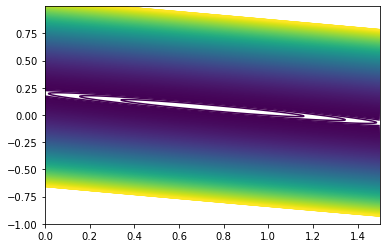

In [108]:
plt.contour(B0,B1,C,levels=np.arange(0,10,0.01))

### (b) Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.


Text(0, 0.5, 'Altura (m)')

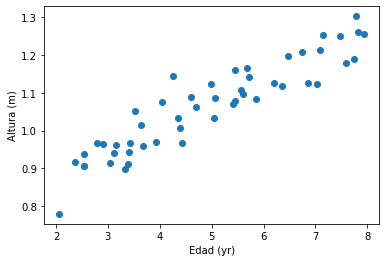

In [114]:
X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')

plt.scatter(X,Y, label="data")
plt.xlabel('Edad (yr)')
plt.ylabel('Altura (m)')

In [116]:
interact(plotGuess, x=fixed(X), y=fixed(Y), interceptor=(0,2,0.02), pendiente=(0,2, 0.02));

interactive(children=(FloatSlider(value=1.0, description='interceptor', max=2.0, step=0.02), FloatSlider(value…

In [118]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


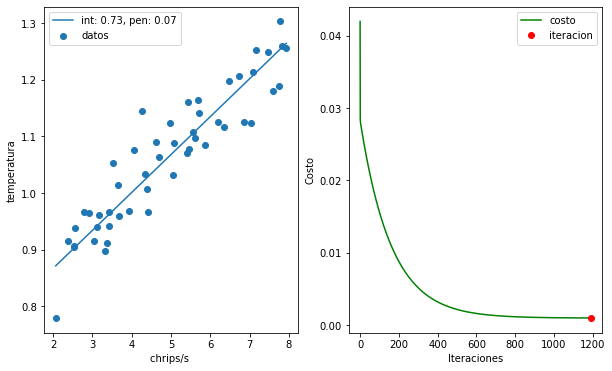

In [121]:
plotModelo(X,Y, r, 1189)

In [122]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModelo, x=fixed(X), y=fixed(Y), rl=fixed(r), iteracion=(0,ultima_iteracion,10));

interactive(children=(IntSlider(value=590, description='iteracion', max=1189, step=10), Output()), _dom_classe…


### (c) Modifique el widget para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.



### (d) Agrega al widget un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este widget)

## Problema 3
### (a) Usando los datos de chirps.txt

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%cat chirps.txt

chirps=np.loadtxt('chirps.txt')
datos=chirps[:,0]
Temp=chirps[:,1]

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3



Entregar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

NOTA: Datos obtenidos de aquí

Text(0, 0.5, 'Temp')

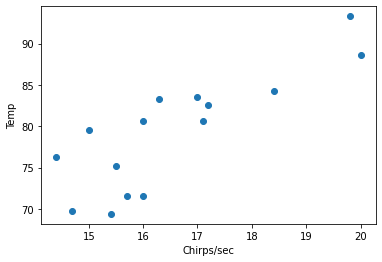

In [5]:
plt.scatter(datos,Temp)
plt.xlabel('Chirps/sec')
plt.ylabel('Temp')

In [8]:
r2=RegresionLineal(alpha=0.003, max_iters=1000000, tols=0)
r2.gradientDescent(datos, Temp)

La función convergió con beta: [22.84870914  3.41033933] en la iteración 383397


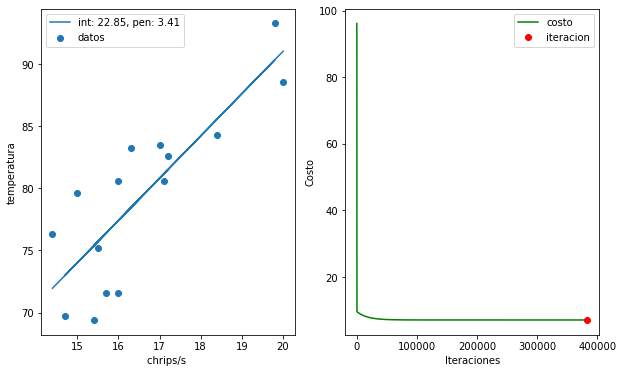

In [10]:
plotModelo(datos,Temp, r2, 383396)

## Problema 4
### (a) Usando los datos del cuarteto de Anscombe Calcule la regresión lineal ¿Qué sucede?

In [27]:
%cat cuartetoA.txt
cuarteto=np.loadtxt('cuartetoA.txt')
x1=cuarteto[:,0]
y1=cuarteto[:,1]
x2=cuarteto[:,2]
y2=cuarteto[:,3]
x3=cuarteto[:,4]
y3=cuarteto[:,5]
x4=cuarteto[:,6]
y4=cuarteto[:,7]


10.0	8.04	10.0	9.14	10.0	7.46	8.0	6.58
8.0	6.95	8.0	8.14	8.0	6.77	8.0	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0	7.71
9.0	8.81	9.0	8.77	9.0	7.11	8.0	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0	7.04
6.0	7.24	6.0	6.13	6.0	6.08	8.0	5.25
4.0	4.26	4.0	3.10	4.0	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0	5.56
7.0	4.82	7.0	7.26	7.0	6.42	8.0	7.91
5.0	5.68	5.0	4.74	5.0	5.73	8.0	6.89

In [35]:

alpha=0.003
max_iters=100000
tols=0.00001

c1=RegresionLineal(alpha,max_iters,tols)
c1.gradientDescent(x1,y1)


c2=RegresionLineal(alpha,max_iters,tols)
c2.gradientDescent(x2,y2)


c3=RegresionLineal(alpha,max_iters,tols)
c3.gradientDescent(x3,y3)


c4=RegresionLineal(alpha,max_iters,tols)
c4.gradientDescent(x4,y4)


La función convergió con beta: [2.47231477 0.55235105] en la iteración 5240
La función convergió con beta: [2.47315734 0.55225772] en la iteración 5241
La función convergió con beta: [2.47476634 0.5519787 ] en la iteración 5243
La función convergió con beta: [2.47399996 0.55216439] en la iteración 5242


In [100]:
arr=np.arange(0,20,0.02)
r1=[] 
r2=[]
r3=[]
r4=[]
r1=2.47231477+0.55235105*arr
r2=2.47315734+0.55225772*arr
r3=2.47476634+0.55197873*arr
r4=2.47399996+0.55216439*arr

No handles with labels found to put in legend.


Text(0, 0.5, 'Y 4')

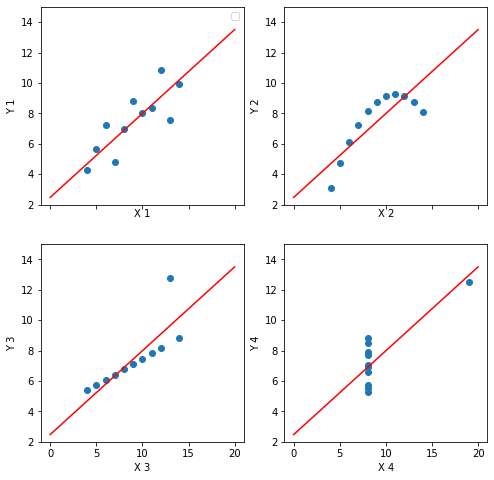

In [101]:
#Gráficas
fig,ax=plt.subplots(2,2,figsize=(8,8),sharex=True)
ax[0][0].scatter(x1,y1)
ax[0][0].plot(arr,r1,color='r')
ax[0][0].legend(loc='best')

ax[0][1].scatter(x2,y2)
ax[0][1].plot(arr,r2,color='r')

ax[1][0].scatter(x3,y3)
ax[1][0].plot(arr,r3,color='r')

ax[1][1].scatter(x4,y4)
ax[1][1].plot(arr,r4,color='r')

#Se ajustan los ejes para que sean iguales para las 4 gráficas:
ax[0][0].set_ylim(2,15)
ax[0][1].set_ylim(2,15)
ax[1][0].set_ylim(2,15)
ax[1][1].set_ylim(2,15)

#Se agregan los nombres de los ejes
ax[0][0].set_xlabel('X 1')
ax[0][1].set_xlabel('X 2')
ax[1][0].set_xlabel('X 3')
ax[1][1].set_xlabel('X 4')

ax[0][0].set_ylabel('Y 1')
ax[0][1].set_ylabel('Y 2')
ax[1][0].set_ylabel('Y 3')
ax[1][1].set_ylabel('Y 4')

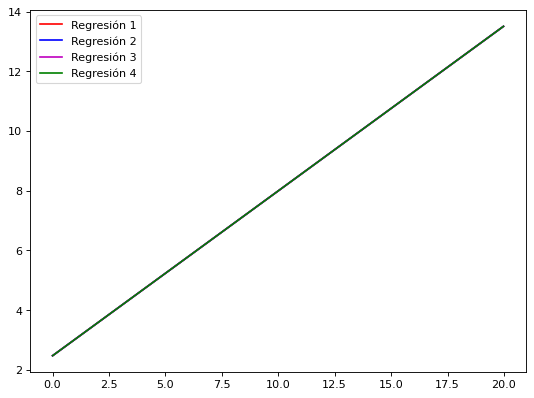

In [102]:
#Graficando en otro cuadro, vemos que las 4 rectas se contraponen entre ellas, así se comprueba también que la regresión lineal es la misma

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(arr,r1,color='r',label='Regresión 1')
plt.plot(arr,r2,color='b',label='Regresión 2')
plt.plot(arr,r3,color='m',label='Regresión 3')
plt.plot(arr,r4,color='g',label='Regresión 4')
plt.legend(loc='best')

## Problema 5
### Use el archivo radioactive_decay.dat

In [13]:
%cat radioactive_decay.txt

rad=np.loadtxt('radioactive_decay.txt')
time=rad[:,0]
N_rem=rad[:,1]

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


### (a) Grafique los datos ¿Qué forma tienen?



Text(0.5, 0, 'Time')

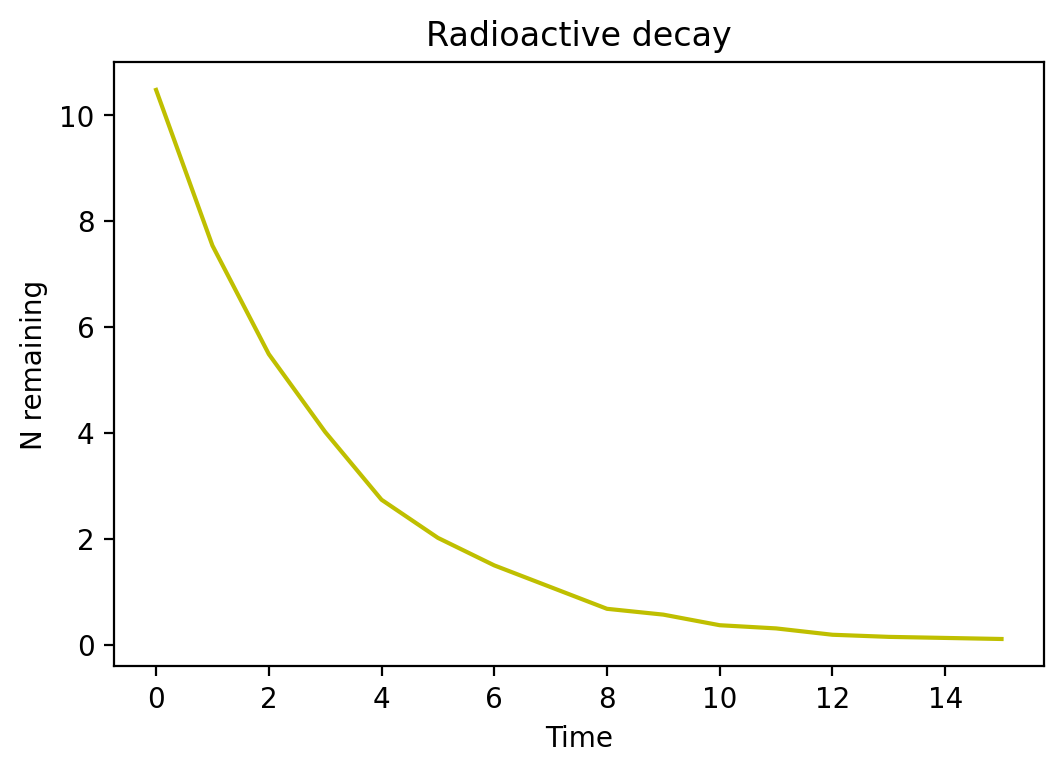

In [14]:
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(time,N_rem,color='y', linewidth=1.5)
plt.title('Radioactive decay')
plt.ylabel('N remaining') 
plt.xlabel('Time')


### (b) ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado transform_radioactive_decay.txt



### (c) Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.


In [24]:
r2=RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r2.gradientDescent(time, N_rem)


La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


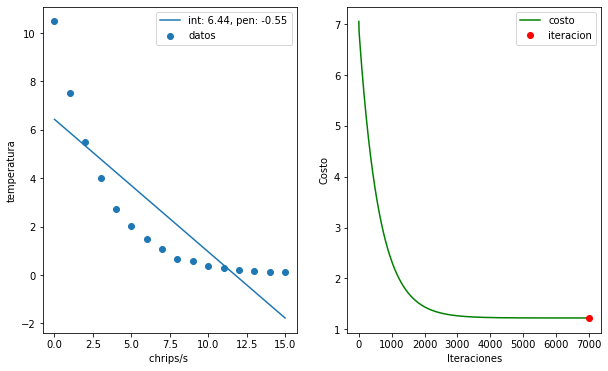

In [25]:
plotModelo(time,N_rem, r2, 7015)

### (d) ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.